In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
# Set the paths to your original dataset directories
fire_dir = "C:/Users/maksim.habirov/Python_Notebooks/fire_dataset/fire_images"
no_fire_dir = "C:/Users/maksim.habirov/Python_Notebooks/fire_dataset/non_fire_images"

# List all the image files
fire_images = [os.path.join(fire_dir, filename) for filename in os.listdir(fire_dir) if filename.endswith('.png')]
no_fire_images = [os.path.join(no_fire_dir, filename) for filename in os.listdir(no_fire_dir) if filename.endswith('.png')]

# Split the data into train, validation, and test sets
train_fire, temp_fire = train_test_split(fire_images, test_size=0.3, random_state=42)
validation_fire, test_fire = train_test_split(temp_fire, test_size=0.5, random_state=42)

train_no_fire, temp_no_fire = train_test_split(no_fire_images, test_size=0.3, random_state=42)
validation_no_fire, test_no_fire = train_test_split(temp_no_fire, test_size=0.5, random_state=42)

# List your train, validation, and test file paths
train_files = train_fire + train_no_fire
validation_files = validation_fire + validation_no_fire
test_files = test_fire + test_no_fire

In [3]:
# Parameters for CNN
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 20
batch_size = 32

# Initialize CNN
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

In [4]:
# Create data generators
def data_generator(files, batch_size):
    while True:
        random.shuffle(files)
        for i in range(0, len(files), batch_size):
            batch_files = files[i:i + batch_size]
            batch_images = [load_img(file, target_size=(img_width, img_height)) for file in batch_files]
            batch_images = [img_to_array(img) / 255.0 for img in batch_images]  # Normalize the images
            batch_labels = [0 if "non_fire" in file else 1 for file in batch_files]  # Assign labels
            yield np.array(batch_images), np.array(batch_labels)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

# Train the model
train_steps = len(train_files) // batch_size
validation_steps = len(validation_files) // batch_size

model.fit(data_generator(train_files, batch_size),
          steps_per_epoch=train_steps,
          epochs=epochs,
          validation_data=data_generator(validation_files, batch_size),
          validation_steps=validation_steps,
          callbacks=[early_stopping])

# Evaluate the model on the test set
test_steps = len(test_files) // batch_size
test_loss, test_accuracy = model.evaluate(data_generator(test_files, batch_size), steps=test_steps)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
21/21 [==============================] - 32s 2s/step - loss: 0.4230 - accuracy: 0.8125 - val_loss: 0.0925 - val_accuracy: 0.9531
Epoch 2/20
21/21 [==============================] - 29s 1s/step - loss: 0.1544 - accuracy: 0.9384 - val_loss: 0.1465 - val_accuracy: 0.9531
Epoch 3/20
21/21 [==============================] - 29s 1s/step - loss: 0.1236 - accuracy: 0.9535 - val_loss: 0.1100 - val_accuracy: 0.9453
Epoch 4/20
21/21 [==============================] - 29s 1s/step - loss: 0.1251 - accuracy: 0.9550 - val_loss: 0.0809 - val_accuracy: 0.9688
Epoch 5/20
21/21 [==============================] - 36s 2s/step - loss: 0.1457 - accuracy: 0.9505 - val_loss: 0.0799 - val_accuracy: 0.9531
Epoch 6/20
21/21 [==============================] - 27s 1s/step - loss: 0.0924 - accuracy: 0.9700 - val_loss: 0.0838 - val_accuracy: 0.9609
Epoch 7/20
21/21 [==============================] - 29s 1s/step - loss: 0.2150 - accuracy: 0.9084 - val_loss: 0.1473 - val_accuracy: 0.9844
Epoch 8/20
4/4 [====

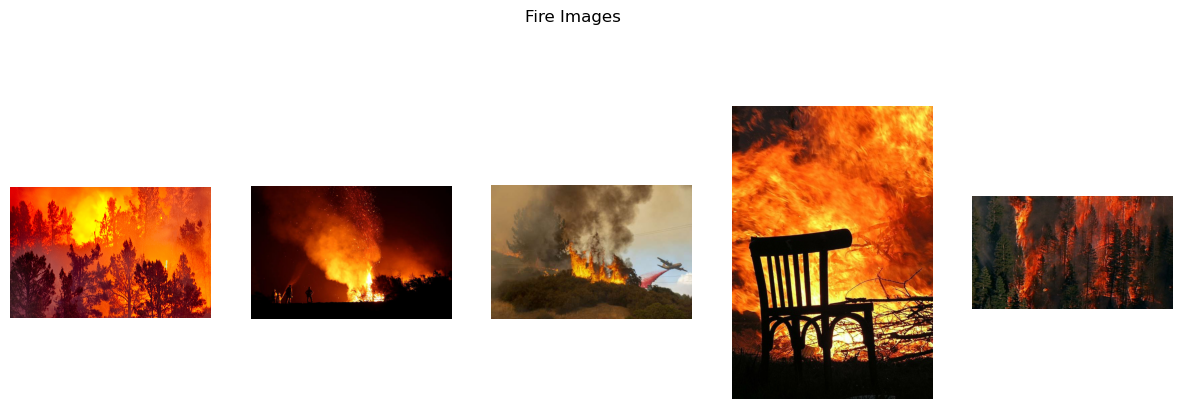

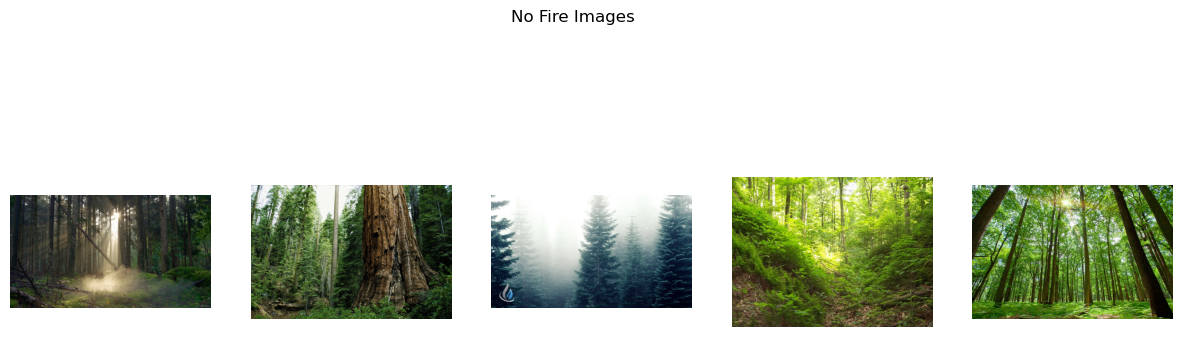

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# List a few random images from each category
num_images_to_display = 5
fire_images = [os.path.join(fire_dir, filename) for filename in random.sample(os.listdir(fire_dir), num_images_to_display)]
no_fire_images = [os.path.join(no_fire_dir, filename) for filename in random.sample(os.listdir(no_fire_dir), num_images_to_display)]

# Function to display images
def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))
    fig.suptitle(title)
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Display fire images
display_images(fire_images, title="Fire Images")
display_images(no_fire_images, title="No Fire Images")

1/1 [==============================] - 0s 24ms/step


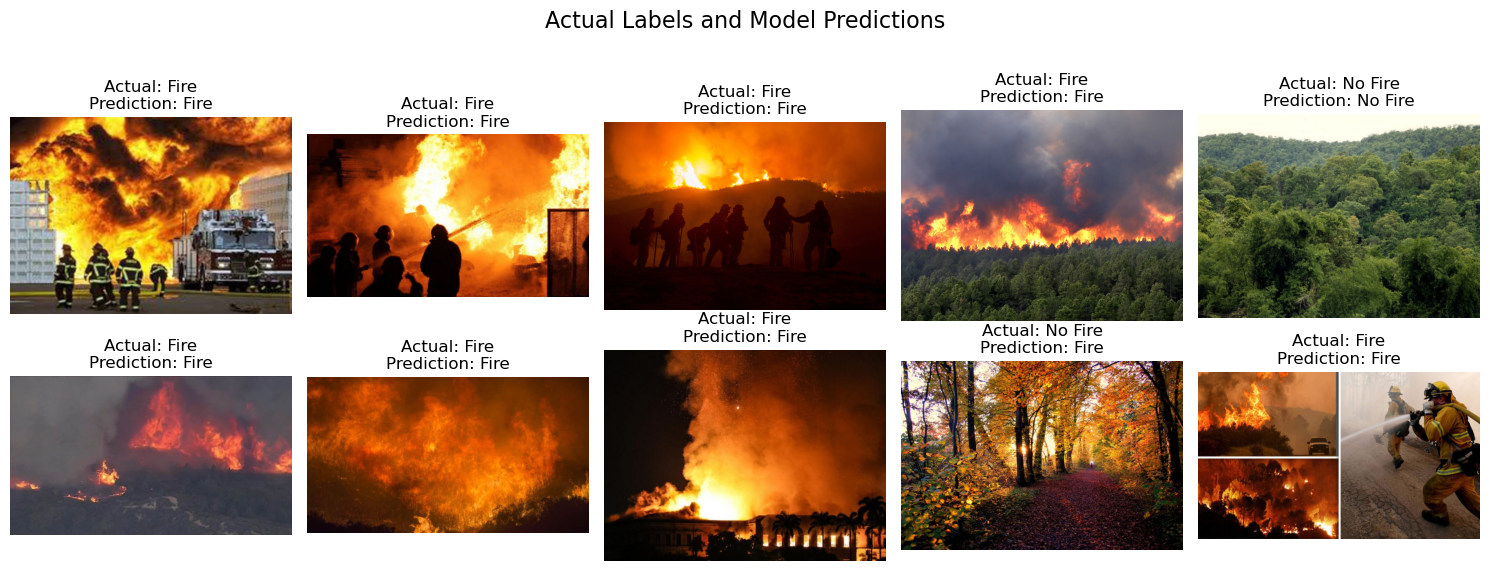

In [6]:
# Function to preprocess and make predictions with actual labels using random images
def predict_random_images_with_labels(image_paths):
    num_images_to_display = min(len(image_paths), 10)
    random_images = random.sample(image_paths, num_images_to_display)
    rows = (num_images_to_display + 4) // 5  # Calculate the number of rows needed (5 images per row)
    
    fig, axes = plt.subplots(rows, 5, figsize=(15, 3 * rows))
    fig.suptitle("Actual Labels and Model Predictions", fontsize=16)
    
    for i in range(num_images_to_display):
        image_path = random_images[i]
        image = Image.open(image_path)
        image = image.resize((img_width, img_height))  # Resize to match model input size
        image = np.array(image) / 255.0  # Normalize
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        prediction = model.predict(image)
        
        if prediction[0] >= 0.5:
            result = "Fire"
        else:
            result = "No Fire"
        
        actual_label = "No Fire" if "non_fire" in image_path else "Fire"
        
        row = i // 5
        col = i % 5
        axes[row, col].imshow(Image.open(image_path))
        axes[row, col].set_title(f"Actual: {actual_label}\nPrediction: {result}")
        axes[row, col].axis('off')
    
    # Hide any remaining empty subplots
    for i in range(num_images_to_display, rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Make predictions and display random images with labels and predictions (up to 10 random images)
predict_random_images_with_labels(test_files)

In [9]:
from tensorflow.keras.applications import VGG16


# Parameters for VGG16 model
img_width, img_height = 224, 224
batch_size = 32
epochs = 20

# Create a VGG16 base model with pre-trained weights and without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add custom classification layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

# Train the model
train_steps = len(train_files) // batch_size
validation_steps = len(validation_files) // batch_size

model.fit(data_generator(train_files, batch_size),
          steps_per_epoch=train_steps,
          epochs=epochs,
          validation_data=data_generator(validation_files, batch_size),
          validation_steps=validation_steps,
          callbacks=[early_stopping])

# Evaluate the model on the test set
test_steps = len(test_files) // batch_size
test_loss, test_accuracy = model.evaluate(data_generator(test_files, batch_size), steps=test_steps)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
21/21 [==============================] - 182s 9s/step - loss: 0.4027 - accuracy: 0.8065 - val_loss: 0.2323 - val_accuracy: 0.8594
Epoch 2/20
21/21 [==============================] - 177s 9s/step - loss: 0.2138 - accuracy: 0.9114 - val_loss: 0.1959 - val_accuracy: 0.8983
Epoch 3/20
21/21 [==============================] - 169s 8s/step - loss: 0.1991 - accuracy: 0.9294 - val_loss: 0.1990 - val_accuracy: 0.9153
Epoch 4/20
21/21 [==============================] - 169s 8s/step - loss: 0.1373 - accuracy: 0.9505 - val_loss: 0.1434 - val_accuracy: 0.9407
Epoch 5/20
21/21 [==============================] - 167s 8s/step - loss: 0.1330 - accuracy: 0.9489 - val_loss: 0.1367 - val_accuracy: 0.9237
Epoch 6/20
21/21 [==============================] - 179s 9s/step - loss: 0.0883 - accuracy: 0.9715 - val_loss: 0.1218 - val_accuracy: 0.9297
Epoch 7/20
21/21 [==============================] - 188s 9s/step - loss: 0.0629 - accuracy: 0.9835 - val_loss: 0.1159 - val_accuracy: 0.9407
Epoch 8/20
21

1/1 [==============================] - 0s 143ms/step


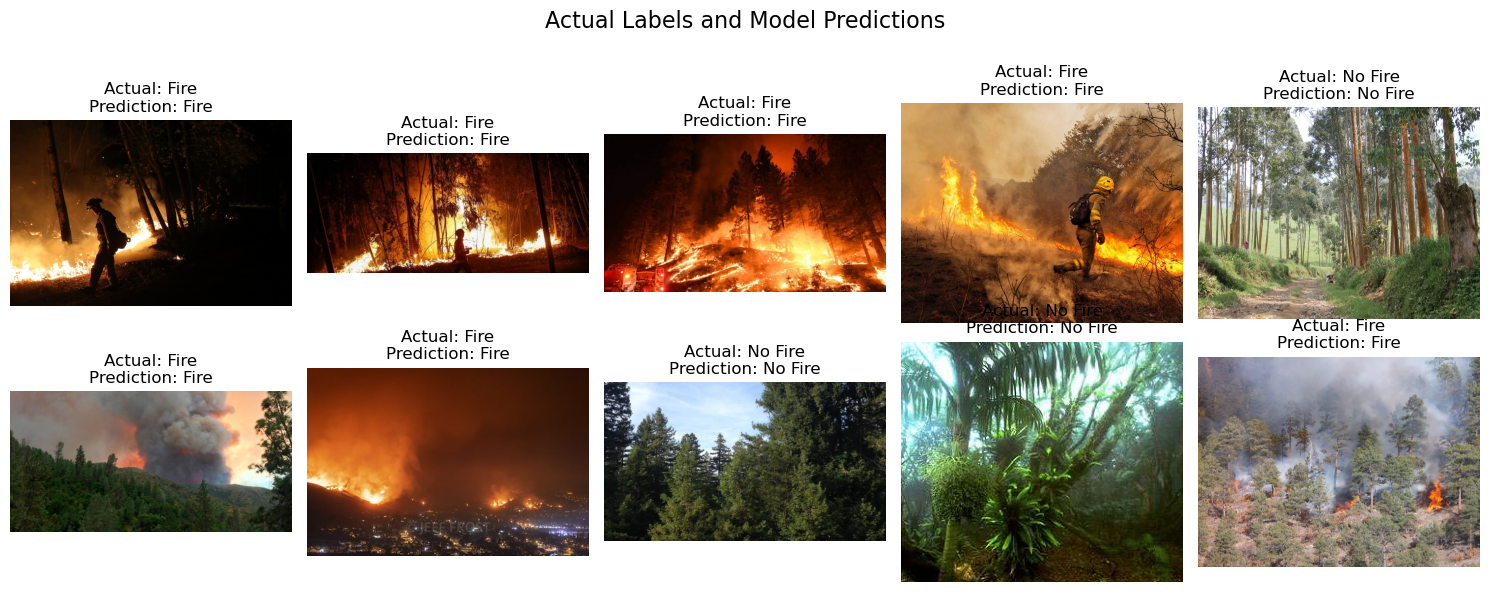

In [11]:
# Make predictions and display random images with labels and predictions (up to 10 random images)
predict_random_images_with_labels(test_files)